In [4]:
import numpy as np
import pandas as pd
import networkx as nx
import netwulf as nw
from scipy import stats as st
import matplotlib.pyplot as plt
stylized_network, config, G = nw.load("Graph.json")
# Given G as the graph

We use an undirected graph because human relationships are bi-directional in most cases. With an assumption that the author who comes first on a paper is the initiator of the relationship we would maybe have used a directed graph, but this is not a reasonable assumption.

In [6]:
print(f'There are {G.number_of_nodes()} nodes and {G.number_of_edges()} links in the graph with resulting density of {nx.density(G)}')

There are 45188 nodes and 975763 links in the graph with resulting density of 0.0009557354882954018


In [15]:
degrees = np.array([d for _, d in G.degree()])

print(f'Statistics for Degrees:\nMedian {np.median(degrees)}\nMean {degrees.mean()}\nMode {st.mode(degrees)}\nMin: {degrees.min()}\nMax: {degrees.max()}')

Statistics for Degrees:
Median 6.0
Mean 43.18681950960432
Mode ModeResult(mode=array([1]), count=array([5379]))
Min: 0
Max: 1283


C:\Users\toell\AppData\Local\Temp\ipykernel_9724\2164658309.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(f'Statistics for Degrees:\nMedian {np.median(degrees)}\nMean {degrees.mean()}\nMode {st.mode(degrees)}\nMin: {degrees.min()}\nMax: {degrees.max()}')


In [11]:
strengths = []
for node in G.nodes:
    strengths.append(sum([G.get_edge_data(*edge)['weight'] for edge in G.edges(node)]))
strengths = np.array(strengths)
print(f'Statistics for Node Strengths:\nMedian {np.median(strengths)}\nMean {strengths.mean()}\nMode {st.mode(strengths)}\nMin: {strengths.min()}\nMax: {strengths.max()}')

Statistics for Node Strengths:
Median 8.0
Mean 63.046295476675226
Mode ModeResult(mode=array([2]), count=array([4772]))
Min: 0
Max: 2183


C:\Users\toell\AppData\Local\Temp\ipykernel_9724\54632661.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(f'Statistics for Node Strengths:\nMedian {np.median(strengths)}\nMean {strengths.mean()}\nMode {st.mode(strengths)}\nMin: {strengths.min()}\nMax: {strengths.max()}')


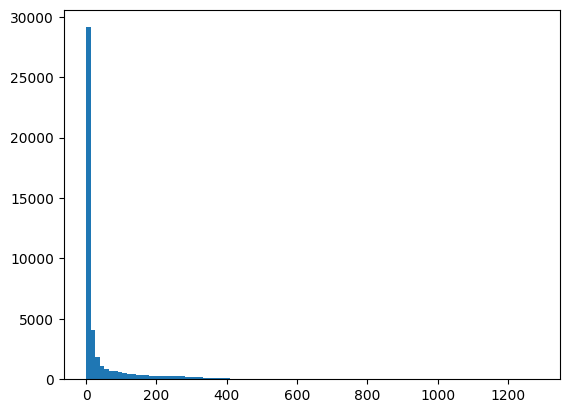

In [13]:
plt.hist(degrees, bins=100)
plt.show()

This shows the heavy-tailed nature of the network.

The following lines find the top author ID's by degree which we subsequently look up to find out what they study.

In [24]:
np.array(G.nodes())[np.argsort(degrees) > (len(degrees) - 6)]
# np.array(G.nodes)

array([  3847277, 118515406,  48961279, 150304655,  34201396], dtype=int64)

In [ ]:
spearman_cor = st.spearmanr(G.nodes['median_citation_count'], degrees)
plt.scatter(G.nodes['median_citation_count'], degrees)
plt.title(f'Median Citation Count vs Degree Count')
plt.xlabel(f'Median Citation Count')
plt.ylabel(f'Degree Count')
plt.show()

The spearman correlation s more robust to outliers, and it seems there are couple of these in the data.